<a href="https://colab.research.google.com/github/CoderMohitSinha/Computer-Vision/blob/main/Problem1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

# suppress warning/error messages in terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# load in data from mnist dataset (60k training, 10k test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape and convert to one-hot
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.16, random_state=42)

In [4]:
'''
Building layers for the feedforward NN:
Hidden layers have 500, 500, and 10 nodes, in that order.
Takes in 784 values (pixel input) and outputs 10 values (predicted probability for each number, 0-9).
'''
model = models.Sequential()
model.add(layers.Dense(500,activation='relu',input_shape=(784,)))
model.add(layers.Dense(500,activation='relu'))
# model.add(layers.Dense(96,activation='relu'))
# model.add(layers.Dense(56,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
			  optimizer='adam',
			  metrics=['accuracy'])

In [5]:
# training the NN
epochs = 250
history = model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")

Epoch 1/250
99/99 - 4s - loss: 7.5322 - accuracy: 0.8496 - val_loss: 0.7564 - val_accuracy: 0.9272
Epoch 2/250
99/99 - 4s - loss: 0.4658 - accuracy: 0.9452 - val_loss: 0.5085 - val_accuracy: 0.9391
Epoch 3/250
99/99 - 4s - loss: 0.2092 - accuracy: 0.9661 - val_loss: 0.3910 - val_accuracy: 0.9470
Epoch 4/250
99/99 - 4s - loss: 0.1045 - accuracy: 0.9786 - val_loss: 0.3802 - val_accuracy: 0.9526
Epoch 5/250
99/99 - 4s - loss: 0.0570 - accuracy: 0.9864 - val_loss: 0.3471 - val_accuracy: 0.9579
Epoch 6/250
99/99 - 4s - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.3511 - val_accuracy: 0.9567
Epoch 7/250
99/99 - 4s - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.3380 - val_accuracy: 0.9583
Epoch 8/250
99/99 - 4s - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.3459 - val_accuracy: 0.9593
Epoch 9/250
99/99 - 4s - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.3555 - val_accuracy: 0.9580
Epoch 10/250
99/99 - 4s - loss: 0.0223 - accuracy: 0.9938 - val_loss: 0.3651 - val_accuracy: 0.9588
Epoch 11/

Text(0, 0.5, 'Accuracy')

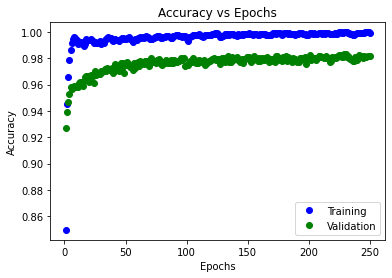

In [8]:
# plotting learning curves during training (on both training and validation data)
epoch_labels = range(1, epochs+1)
hist_dict = history.history
plt.title("Accuracy vs Epochs")
plt.plot(epoch_labels, hist_dict["accuracy"],'bo', label="Training")
plt.plot(epoch_labels, hist_dict["val_accuracy"],'go', label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [9]:
# evaluating final performance using test data
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()


Checking accuracy on test set...
20/20 [==============================] - 0s 14ms/step - loss: 1.8329 - accuracy: 0.9789

Accuracy on test set: 0.9789000153541565
